### Iris Flower DataSet

Toy Dataset: Iris Dataset:
    <a href = "https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris DataSet Link</a>
        
Objective for this lab:
    Classify a new flower as belonging to one of the 3 classes given the 4 features.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('../data/iris.data')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
iris = iris.rename(columns={'5.1': 'sepal_length'})
iris = iris.rename(columns={'3.5': 'sepal_width'})
iris = iris.rename(columns={'1.4': 'petal_length'})
iris = iris.rename(columns={'0.2': 'petal_width'})
iris = iris.rename(columns={'Iris-setosa': 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
print(iris.shape)

(149, 5)


In [5]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


#### Q:- How many data points for each class are present? </br> OR </br> How many flowers for each species are present

In [6]:
iris["species"].value_counts()

# if there is same number of species present in the dataset then it called as balanced dataset. 
# Our dataset is imbalanced dataset

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

### 2-D scatter Plot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

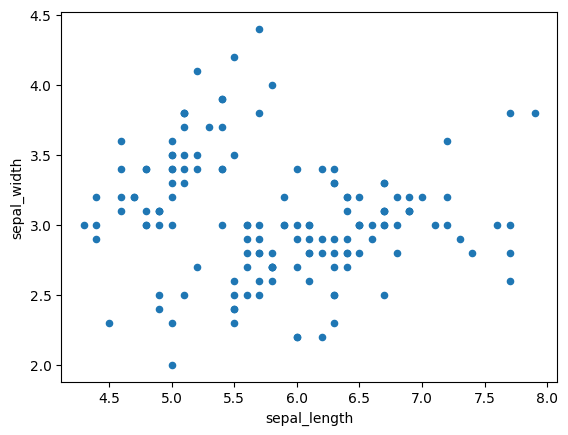

In [7]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')

# cannot make much sense out of it.

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


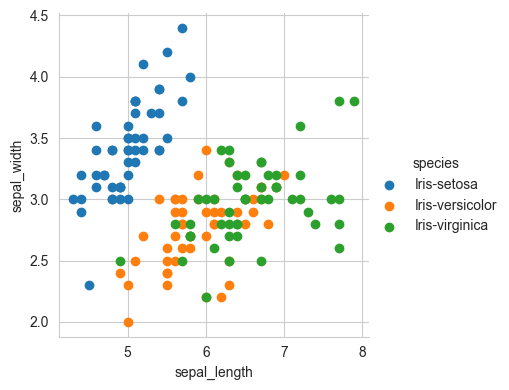

In [8]:
sn.set_style("whitegrid")
g = sn.FacetGrid(iris, hue="species", height=4)
g.map(plt.scatter, "sepal_length", "sepal_width")
g.add_legend()
plt.show()

### Observations:- 

1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Separating Versicolor form Verginica is much harder as they have considered overlap.

### 3-D scatter plot

Do this on [https://plot.ly/pandas/3d-scatter-plots/]

Needs a lot of mouse movement to interpret data. <br>
What about 4d, 5-d or nd scatter plot? <br>
The hack to see or able to see 4-d space is to use pair plot.

### Pair - Plot

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


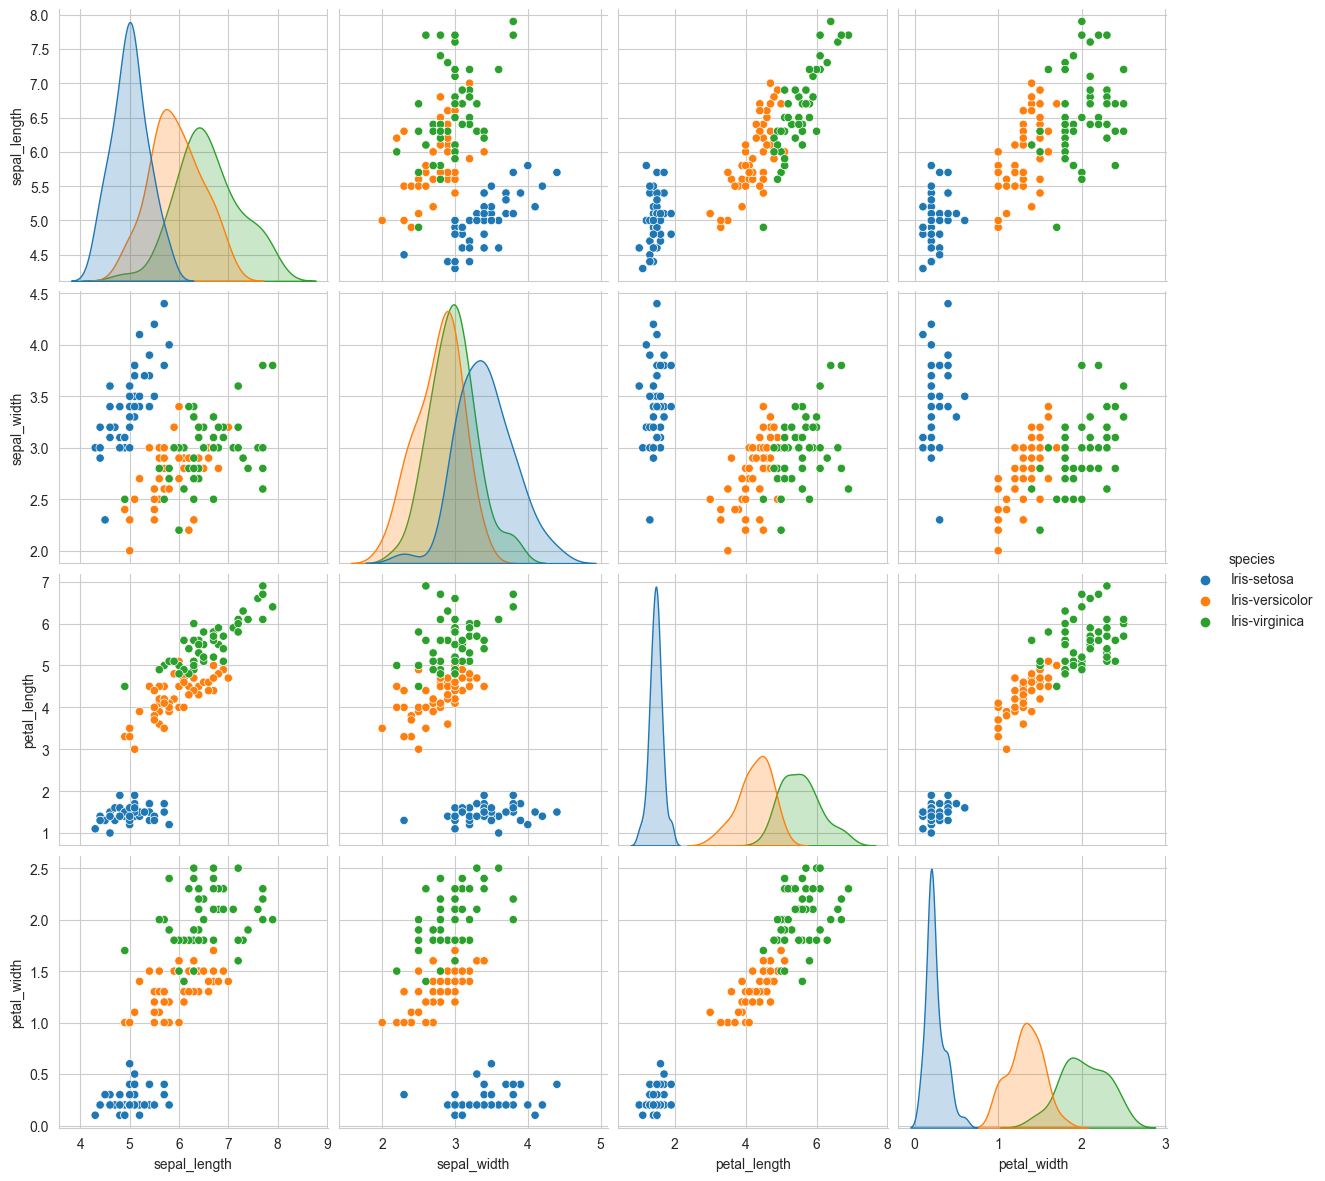

In [9]:
plt.close()
sn.set_style("whitegrid")
sn.pairplot(iris, hue = "species", size = 3)
plt.show()

#### Observations:- 

1. petal_length and petal_width are the most useful features to identify various flower types. <br>
2. While Setosa can be easily identified (linearly separable), Virnica and Versicolor have some overlap (almost linearly separable). <br>
3. We can find "lines" and "if-else" conditions to build a simple model to classify the feature types. <br>

#### Limitations of Pair-Plot

In [10]:
# can be used if no. of features is 4, 5, 6
# but if no. of features is too high then pair plot cannot help us.
# In such cases we use Linear ALgebra, dimensionality reduction, t-SNE, PCA etc. 

### 1-D Scatter Plot

#### Histogram, PDF, CDF

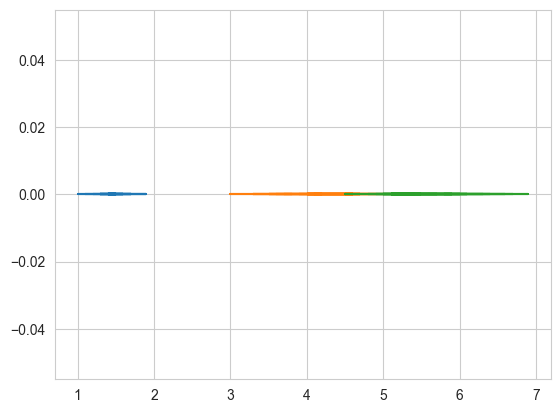

In [21]:
import numpy as np

iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
# In Pandas, the loc function is used to access a group of rows and columns by label(s) or a boolean array
# dataframe.loc[row_label(s), column_label(s)]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']))
plt.show()

# Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

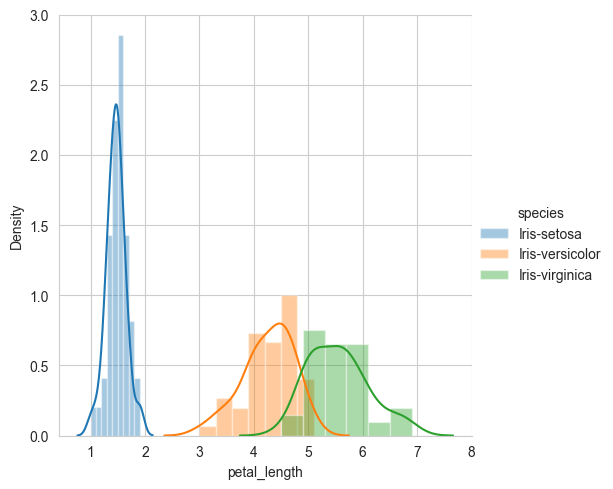

In [20]:
g = sn.FacetGrid(iris, hue = "species", height = 5)
g.map(sn.distplot, "petal_length")
g.add_legend()

plt.show()

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

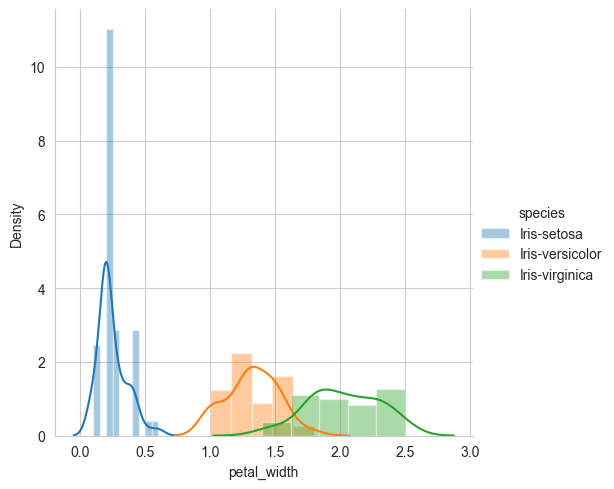

In [22]:
g = sn.FacetGrid(iris, hue = "species", height = 5)
g.map(sn.distplot, "petal_width")
g.add_legend()

plt.show()

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


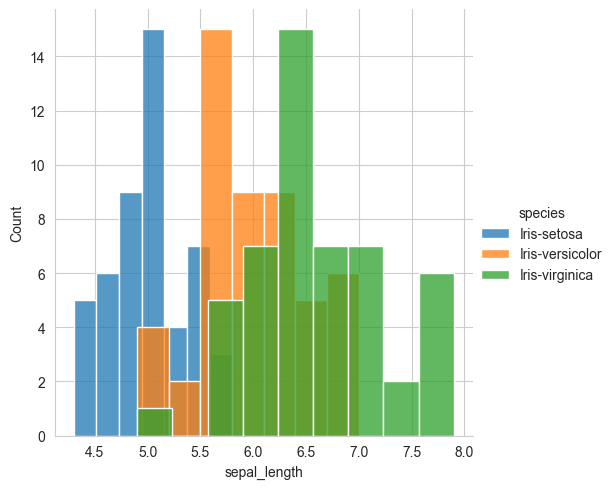

In [28]:
g = sn.FacetGrid(iris, hue = "species", height = 5)
g.map(sn.histplot, "sepal_length")
g.add_legend()

plt.show()

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


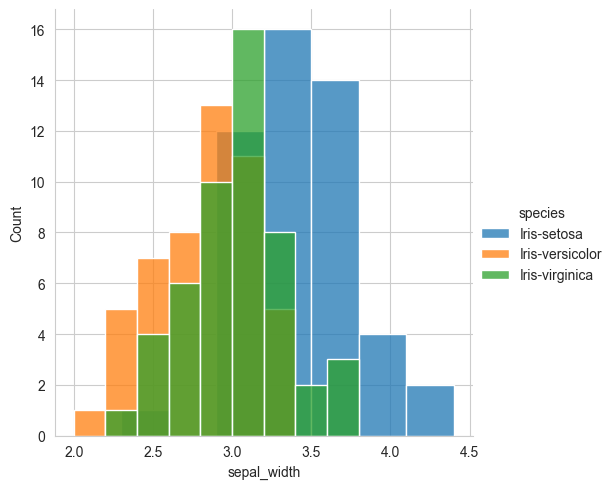

In [27]:
g = sn.FacetGrid(iris, hue = "species", height = 5)
g.map(sn.histplot, "sepal_width")
g.add_legend()

plt.show()

In [29]:
# we can make PDF by distribution plot with seaborn - sn.distplot()
# if we do integrate pdf then we get cdf
# if we differentiate cdf then we get pdf 

[0.02040816 0.02040816 0.04081633 0.14285714 0.2244898  0.28571429
 0.14285714 0.08163265 0.         0.04081633]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


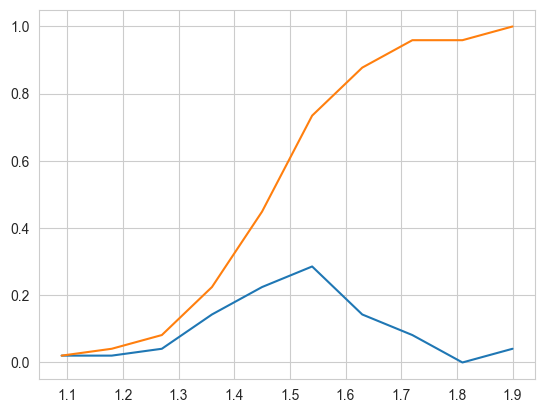

In [32]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal length less than 1.6?
# How to construct a CDF?
# How to read a CDF? 

# plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.02040816 0.02040816 0.04081633 0.14285714 0.2244898  0.28571429
 0.14285714 0.08163265 0.         0.04081633]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


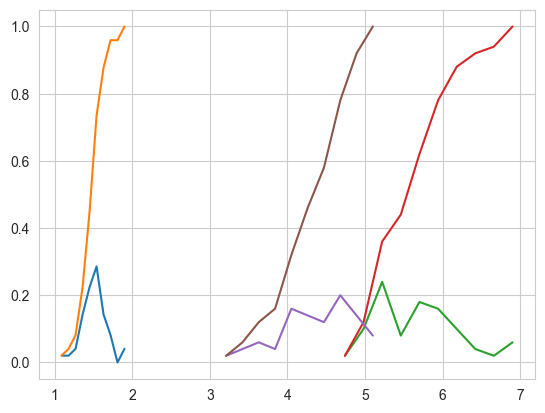

In [33]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();